In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt

# dataset
from tensorflow.keras.datasets import cifar10
# model and the layers
from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, GlobalMaxPooling2D, Dense
from tensorflow.keras.models import Model

In [0]:
# load the dataset
cifar10 = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar10
# centerize the X
x_train, x_test = x_train / 255.0, x_test / 255.0
# let's look at the shapes
print('X shape \n Train: {} | Test: {}'.format(x_train.shape, x_test.shape))
print('Y shape \n Train: {} | Test: {}'.format(y_train.shape, y_test.shape))

170500096/170498071 [==============================] - 4s 0us/step
X shape 
 Train: (50000, 32, 32, 3) | Test: (10000, 32, 32, 3)
Y shape 
 Train: (50000, 1) | Test: (10000, 1)


In [0]:
# We can see that input data is 3D, (Nx(32x32x3)) 
# That's because the images in the dataset have a dimension for color channels
# this dimension is called "feature map" which includes all the features
# of filters. 

# Also we need to flatten the Y because the output should be 1D vector
y_train, y_test = y_train.flatten(), y_test.flatten()

In [0]:
# how much classes do we have?
K = len(set(y_train))
print(K)

10


In [0]:
# Set the layers
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(.3  )(x)
x = Dense(K, activation = 'softmax')(x)

# Create the model
model = Model(i, x)

# compile the model
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# fit the model
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 160us/sample - loss: 1.5938 - accuracy: 0.4182 - val_loss: 1.3274 - val_accuracy: 0.5043
Epoch 2/20
50000/50000 [==============================] - 7s 140us/sample - loss: 1.2964 - accuracy: 0.5316 - val_loss: 1.1106 - val_accuracy: 0.6048
Epoch 3/20
50000/50000 [==============================] - 7s 141us/sample - loss: 1.1645 - accuracy: 0.5821 - val_loss: 1.0706 - val_accuracy: 0.6194
Epoch 4/20
50000/50000 [==============================] - 7s 141us/sample - loss: 1.0820 - accuracy: 0.6144 - val_loss: 1.0302 - val_accuracy: 0.6292
Epoch 5/20
50000/50000 [==============================] - 7s 140us/sample - loss: 1.0106 - accuracy: 0.6399 - val_loss: 0.9409 - val_accuracy: 0.6702
Epoch 6/20
50000/50000 [==============================] - 7s 143us/sample - loss: 0.9577 - accuracy: 0.6606 - val_loss: 0.9327 - val_accuracy: 0.6768
Epoch 7/20
50000/50000 [==========================

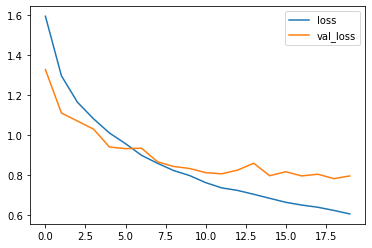

In [0]:
# plot the loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

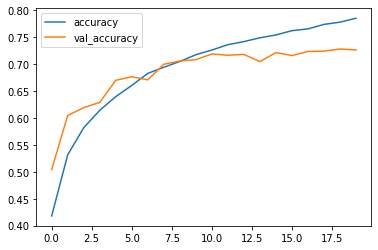

In [0]:
# plot the accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [0]:
p_test = model.predict(x_test).argmax(axis = 1)

Text(0.5, 1.0, 'Predicted: automobile | True Label: truck')

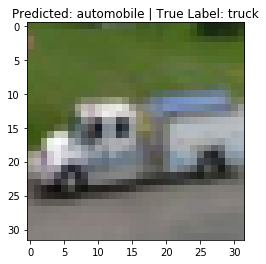

In [0]:
# some of the misclassified samples
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
misclassified_idx = np.where(p_test != y_test)[0]
e = np.random.choice(misclassified_idx)
plt.imshow(x_test[e])
plt.title("Predicted: {} | True Label: {}".format(labels[p_test[e]], labels[y_test[e]]))